<a href="https://colab.research.google.com/github/akinniyi-opeyemi/Stats-507-Project-Submission/blob/main/Stats507_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This work is carrid out by Opeyemi Akinniyi**

In [1]:
!pip install fsspec==2024.9.0
!pip install datasets transformers
from datasets import load_dataset
import pandas as pd
import logging
logging.getLogger("huggingface_hub").setLevel(logging.ERROR)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.3 MB/s eta 0:00:00


In [2]:
dataset = load_dataset("lazylegere/Global_Data_on_Sustainable_Energy")
print(dataset)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


file97bd2d5287ff.csv:   0%|          | 0.00/3.01M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/65712 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Entity', 'Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'CPI 2020', 'CPI 2015', 'Financial flows to developing countries (US $) in constant 2020', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude'],
        num_rows: 65712
    })
})


In [3]:
print(dataset.keys())
print(dataset['train'][0:5])

dict_keys(['train'])
{'Entity': ['Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan'], 'Year': [2000.0, 2001.0, 2002.0, 2003.0, 2004.0], 'Access to electricity (% of population)': [1.613591, 4.074574, 9.409158, 14.738506, 20.064968], 'Access to clean fuels for cooking': [6.2, 7.2, 8.2, 9.5, 10.9], 'Renewable-electricity-generating-capacity-per-capita': [9.22, 8.86, 8.47, 8.09, 7.75], 'Financial flows to developing countries (US $)': [20000.0, 130000.0, 3950000.0, 25970000.0, None], 'CPI 2020': [267.193, 267.193, 267.193, 267.193, 267.193], 'CPI 2015': [232.914, 232.914, 232.914, 232.914, 232.914], 'Financial flows to developing countries (US $) in constant 2020': [22943.48987, 149132.6842, 4531339.25, 29792121.6, 0.0], 'Renewable energy share in the total final energy consumption (%)': [44.99, 45.6, 37.83, 36.66, 44.24], 'Electricity from fossil fuels (TWh)': [0.16, 0.09, 0.13, 0.31, 0.33], 'Electricity from nuclear (TWh)': [0.0, 0.0, 0.0, 0.0, 0.0], 'Electricity 

In [4]:

df = pd.DataFrame(dataset['train'])
drop_this_columns = ['Access to clean fuels for cooking','CPI 2020', 'CPI 2015', 'Density\\n(P/Km2)']
df.drop(drop_this_columns, axis=1, inplace=True)
df.rename(columns={'Entity':'Country', 'Value_co2_emissions_kt_by_country':'Country CO2 Emissions' }, inplace=True)
df = df[df['Year']>= 2010.0].reset_index(drop=True)
df.head()

,Country,Year,Access to electricity (% of population),Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Financial flows to developing countries (US $) in constant 2020,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Country CO2 Emissions,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2010.0,42.70000,8.27,36500000.0,4.187187e+07,15.15,0.19,0.0,0.75,79.787230,1182.8920,2.46,7110.000134,NaN,14.362441,543.306526,652230.0,33.93911,67.709953
1,Afghanistan,2011.0,43.22202,8.13,28690000.0,3.291244e+07,12.61,0.18,0.0,0.60,76.923090,1436.1143,3.23,8930.000305,NaN,0.426355,591.190030,652230.0,33.93911,67.709953
2,Afghanistan,2012.0,69.10000,9.29,62630000.0,7.184754e+07,15.36,0.14,0.0,0.74,84.090910,1324.1211,2.61,8079.999924,NaN,12.752287,638.845852,652230.0,33.93911,67.709953
3,Afghanistan,2013.0,68.29065,9.10,268460000.0,3.079705e+08,16.86,0.22,0.0,0.89,80.180176,1060.7926,2.46,5989.999771,NaN,5.600745,624.315454,652230.0,33.93911,67.709953
4,Afghanistan,2014.0,89.50000,8.95,6940000.0,7.961391e+06,18.93,0.16,0.0,1.00,86.206900,868.5762,2.25,4880.000114,NaN,2.724543,614.223342,652230.0,33.93911,67.709953


In [5]:
from sklearn.preprocessing import LabelEncoder

df.fillna(0, inplace=True)
if 'Country' in df.columns:
    df = df[df['Country'].apply(lambda x: isinstance(x, str))]
encoder = LabelEncoder()
df['country_code'] = encoder.fit_transform(df['Country'])
y = target = df['Country CO2 Emissions']
X = features = df.drop(columns = ['Country','Country CO2 Emissions'])
y.head()
#X.head()

<ipython-input-5-055b685c6ce4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country_code'] = encoder.fit_transform(df['Country'])


,Country CO2 Emissions
0,7110.000134
1,8930.000305
2,8079.999924
3,5989.999771
4,4880.000114


In [6]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
# Convert the Pandas Series to a NumPy array before reshaping
y = y.to_numpy().reshape(-1, 1)
X_normalised = scaler.fit_transform(X)
print(y)
print(X_normalised)
scaler = MinMaxScaler()
y = y.reshape(-1,1)
X_normalised = scaler.fit_transform(X)
print(y)
print(X_normalised)

[[ 7110.000134]
 [ 8930.000305]
 [ 8079.999924]
 ...
 [11760.00023 ]
 [    0.      ]
 [    0.      ]]
[[0.         0.427      0.00270245 ... 0.70694423 0.68761236 0.        ]
 [0.09090909 0.4322202  0.0026567  ... 0.70694423 0.68761236 0.        ]
 [0.18181818 0.691      0.00303576 ... 0.70694423 0.68761236 0.        ]
 ...
 [0.81818182 0.46781475 0.02659966 ... 0.20672939 0.57847253 1.        ]
 [0.90909091 0.5274767  0.0263415  ... 0.20672939 0.57847253 1.        ]
 [1.         0.         0.         ... 0.38635144 0.49594242 1.        ]]
[[ 7110.000134]
 [ 8930.000305]
 [ 8079.999924]
 ...
 [11760.00023 ]
 [    0.      ]
 [    0.      ]]
[[0.         0.427      0.00270245 ... 0.70694423 0.68761236 0.        ]
 [0.09090909 0.4322202  0.0026567  ... 0.70694423 0.68761236 0.        ]
 [0.18181818 0.691      0.00303576 ... 0.70694423 0.68761236 0.        ]
 ...
 [0.81818182 0.46781475 0.02659966 ... 0.20672939 0.57847253 1.        ]
 [0.90909091 0.5274767  0.0263415  ... 0.20672939 0.578

In [7]:
#Splitting to test and train and fitting machine Learning model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalised, y, test_size=0.2, random_state=42)

In [8]:
#performing simple linear regression for observation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import time

start_time = time.perf_counter()
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)

# Evaluate the model
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_rmse= np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, y_pred_linear)

print("Mean Squared Error (MSE):", linear_mse)
print("RMSE: ", linear_rmse)
print("R² Score:", linear_r2)

linear_regression_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", linear_regression_scores)
print("Mean R² score:", linear_regression_scores.mean())
print('model time in seconds: ',time.perf_counter() - start_time)

Mean Squared Error (MSE): 32095733467.330135
RMSE:  179152.82154442932
R² Score: 0.9608763658295987
Cross-validated R² scores: [ 0.89769647  0.92283778  0.85954337  0.85984351 -2.35441554]
Mean R² score: 0.23710111729197864
model time in seconds:  0.3423281999999972


In [9]:
#perform lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import time

start_time = time.perf_counter()

model = Lasso(alpha=100)
model.fit(X_train, y_train)
y_pred_lasso = model.predict(X_test)

# Evaluate the model
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse= np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Mean Squared Error (MSE):", lasso_mse)
print("RMSE: ", lasso_rmse)
print("R² Score:", lasso_r2)

lasso_regression_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", lasso_regression_scores)
print("Mean R² score:", lasso_regression_scores.mean())
print('model time in seconds: ',time.perf_counter() - start_time)

Mean Squared Error (MSE): 32173931466.93727
RMSE:  179370.93261433768
R² Score: 0.9607810450626624
Cross-validated R² scores: [ 0.89773868  0.92332957  0.8786622   0.86185799 -2.30293698]
Mean R² score: 0.2517302926934072
model time in seconds:  0.0970766849999336


In [10]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import time

start_time = time.perf_counter()
# Automatically tune alpha with cross-validation
model = LassoCV(alphas=[0.1, 1, 10, 100, 1000, 10000, 100000], cv=5, random_state=42)
model.fit(X_train, y_train)

print("best alpha from CV: ", model.alpha_)
y_pred_lasso_cv = model.predict(X_test)

lasso_cv_mse = mean_squared_error(y_test, y_pred_lasso_cv)
lasso_cv_rmse= np.sqrt(lasso_cv_mse)
lasso_cv_r2 = r2_score(y_test, y_pred_lasso_cv)

print("Mean Squared Error (MSE):", lasso_cv_mse)
print("RMSE: ", lasso_cv_rmse)
print("R² Score:", lasso_cv_r2)

lasso_cv_regression_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", lasso_cv_regression_scores)
print("Mean R² score:", lasso_cv_regression_scores.mean())
print('model time in seconds: ',time.perf_counter() - start_time)

best alpha from CV:  1000.0
Mean Squared Error (MSE): 40505545331.12529
RMSE:  201259.89498935273
R² Score: 0.9506250842025272


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross-validated R² scores: [ 0.89272869  0.91536816  0.95397909  0.87256801 -2.34808603]
Mean R² score: 0.25731158355328543
model time in seconds:  0.42172774599998775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


This is a bad RMSE Cross Validation Score. Therefore, there is need to optimise or use better models. Other models selected for exploration are random forest regressors, XGBoost.

In [11]:
#1. Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import cross_val_score
import time

start_time = time.perf_counter()
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred_rfr = model.predict(X_test)

# Evaluate the model
rfr_mse = mean_squared_error(y_test, y_pred_rfr)
rfr_rmse = np.sqrt(rfr_mse)
rfr_r2 = r2_score(y_test, y_pred_rfr)

print("Mean Squared Error (MSE):", rfr_mse)
print("R² Score:", rfr_r2)
print("RMSE:", rfr_rmse)

random_forest_regression_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", random_forest_regression_scores)
print("Mean R² score:", random_forest_regression_scores.mean())
print('model time in seconds: ',time.perf_counter() - start_time)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error (MSE): 5601661920.256825
R² Score: 0.9931717599805758
RMSE: 74844.25108354566


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-validated R² scores: [ 0.97916242  0.97839129  0.99255832  0.87387465 -1.02543698]
Mean R² score: 0.5597099404920736
model time in seconds:  12.84665033400006


Bad Score. Although some folds give a good RMSE, the one with a negative value suggests there could be a problem with the dataset. Possibly, there is huge variation in the relation of certain features to the target. To reduce the variation, there is need to ensure only releant features are used.

Year: 0.002625706292426929
Access to electricity (% of population): 0.0015479875203447332
Renewable-electricity-generating-capacity-per-capita: 0.005037519923295547
Financial flows to developing countries (US $): 0.012814051148108399
Financial flows to developing countries (US $) in constant 2020: 0.012560153058346884
Renewable energy share in the total final energy consumption (%): 0.015988407446841654
Electricity from fossil fuels (TWh): 0.8477562210619481
Electricity from nuclear (TWh): 0.009590382858621507
Electricity from renewables (TWh): 0.0034954071208005474
Low-carbon electricity (% electricity): 0.0032814027948774457
Primary energy consumption per capita (kWh/person): 0.012970095273767643
Energy intensity level of primary energy (MJ/$2017 PPP GDP): 0.01594590331748076
Renewables (% equivalent primary energy): 0.00252242130586552
gdp_growth: 0.022971872410103886
gdp_per_capita: 0.009697999155577482
Land Area(Km2): 0.008340116985946089
Latitude: 0.005437818846104869
Longitude: 

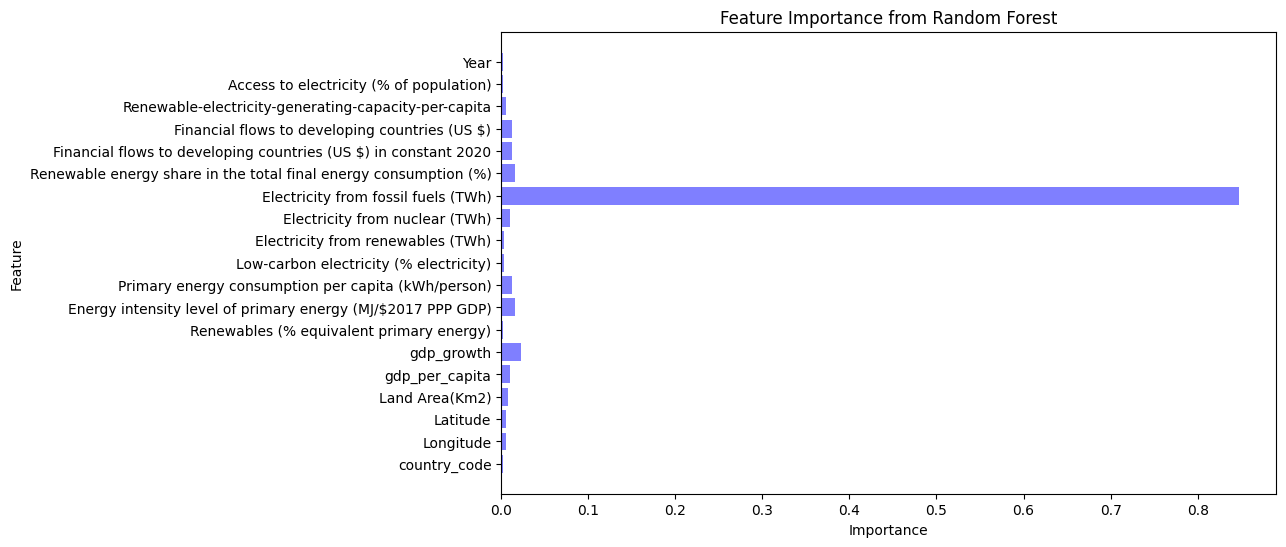

In [12]:
import matplotlib.pyplot as plt
start_time = time.perf_counter()
original_feature_names = X.columns
feature_importance = model.feature_importances_
for feature_name, importance in zip(original_feature_names, feature_importance):
    print(f"{feature_name}: {importance}")

importance_df = pd.DataFrame({
    'Feature': original_feature_names,
    'Importance': feature_importance
})

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=(0, 0, 1, 0.5))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

importance_threshold = 1/100
important_feature_indices = [i for i, importance in enumerate(feature_importance) if importance > importance_threshold]
X_train_filtered = X_train[:, important_feature_indices]
X_test_filtered = X_test[:, important_feature_indices]

print(f"Retained Features: {original_feature_names[important_feature_indices]}")
print('model time in seconds: ',time.perf_counter() - start_time)

Features like years, Access to electricity, and Renewable energy have lower importance to the target. These features can be excluded for a btter represenation of the feature influence on the targeted output. In this analysis, importance values \lt 1% is excluded.

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import cross_val_score
import time

start_time = time.perf_counter()
model = RandomForestRegressor(random_state=42)
model.fit(X_train_filtered, y_train)
y_pred_rfr_imp = model.predict(X_test_filtered)
print("MSE:", mean_squared_error(y_test, y_pred_rfr_imp))
print("R² Score:", r2_score(y_test, y_pred_rfr_imp))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_rfr_imp)))
scores = cross_val_score(model, X_train_filtered, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R² score:", scores.mean())
print('model time in seconds: ',time.perf_counter() - start_time)

Retained Features: Index(['Financial flows to developing countries (US $)',
       'Financial flows to developing countries (US $) in constant 2020',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'gdp_growth'],
      dtype='object')
model time in seconds:  0.5329991549999704


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE: 4422211722.305567
R² Score: 0.9946094706380942
RMSE: 66499.71219716343


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-validated R² scores: [ 0.97596436  0.98744701  0.99028692  0.93320228 -0.21652509]
Mean R² score: 0.7340750954021205
model time in seconds:  5.976463392000028


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import time

run_search = False
if run_search:
  start_time = time.perf_counter()
  # Define hyperparameter grid
  param_grid = {
      'n_estimators': [100, 200, 300],
      'max_depth': [10, 15, 20, None],
      'max_features': ['sqrt', 'log2', None],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4]
  }

  # Initialize Random Forest
  model = RandomForestRegressor(random_state=42)

  # GridSearchCV
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
  grid_search.fit(X_train_filtered, y_train)

  # Best parameters and score
  print("Best Parameters:", grid_search.best_params_)
  print("Best Cross-Validated R²:", grid_search.best_score_)
  print('Grid search for random forest regressor in seconds: ',time.perf_counter() - start_time)

'''
  This code took 1683 seconds, as a result it is made passive
  Results from grid search:
  Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, random_state = 42}
  Best Cross-Validated R²: 0.8538199421025897
  Grid search time for random forest regressor in seconds: 1683.1201328680004
'''

"\n  This code took 1683 seconds, as a result it is made passive\n  Results from grid search:\n  Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, random_state = 42}\n  Best Cross-Validated R²: 0.8538199421025897\n  Grid search time for random forest regressor in seconds: 1683.1201328680004\n"

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import time

start_time = time.perf_counter()

# Train the optimized model with the best parameters
optimized_model = RandomForestRegressor(
    max_depth=15,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

optimized_model.fit(X_train_filtered, y_train.ravel())  # Use .ravel() to avoid the column-vector warning

# Evaluate on the test set

y_pred_rfr_imp_opt = optimized_model.predict(X_test_filtered)
rfr_opt_r2 = r2_score(y_test, y_pred_rfr_imp_opt)
rfr_opt_mse = mean_squared_error(y_test, y_pred_rfr_imp_opt)
rfr_opt_rmse = sqrt(rfr_opt_mse)
print("Test R²:", rfr_opt_r2)
print("Test MSE:", rfr_opt_mse)
print("Test RMSE:", rfr_opt_rmse)
scores = cross_val_score(optimized_model, X_train_filtered, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R² score:", scores.mean())
print('model time in seconds: ',time.perf_counter() - start_time)

Test R²: 0.9097664156203378
Test MSE: 74024643555.28899
Test RMSE: 272074.7021596991


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-validated R² scores: [0.90084215 0.91305237 0.95696868 0.87982623 0.61841028]
Mean R² score: 0.8538199421025897
model time in seconds:  7.905032270999982


Financial flows to developing countries (US $): 0.06039514171123826
Financial flows to developing countries (US $) in constant 2020: 0.07018271912844602
Renewable energy share in the total final energy consumption (%): 0.0545006645000681
Electricity from fossil fuels (TWh): 0.593684359813346
Primary energy consumption per capita (kWh/person): 0.10567041801657565
Energy intensity level of primary energy (MJ/$2017 PPP GDP): 0.04325996829041458
gdp_growth: 0.07230672853991141


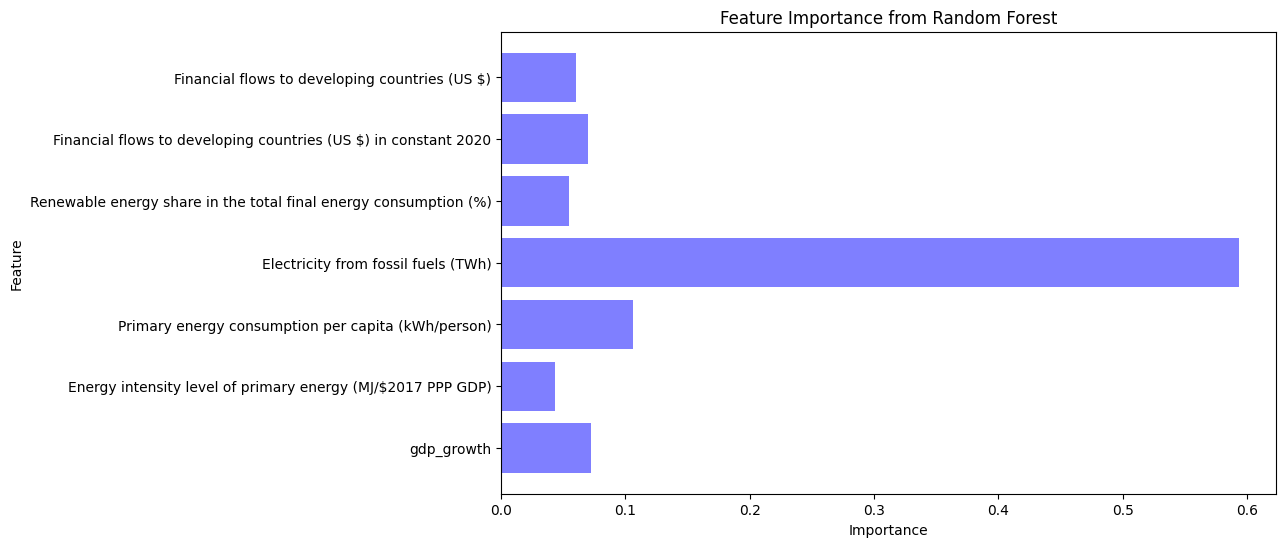

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

new_feature_names = original_feature_names[important_feature_indices]
feature_importance = optimized_model.feature_importances_

# Print feature names with their importances
for feature_name, importance in zip(new_feature_names, feature_importance):
    print(f"{feature_name}: {importance}")

# Assuming feature_importance contains the importance values and original_feature_names contains the feature names
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': new_feature_names,
    'Importance': feature_importance
})

# Sort by importance for better visualization
#importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=(0, 0, 1, 0.5))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

In [17]:
print("Target Mean:", y_test.mean())
print("Target Std Dev:", y_test.std())

Target Mean: 144790.0930267119
Target Std Dev: 905741.0634877307


In [18]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import cross_val_score
import time

start_time = time.perf_counter()

xgb_model = XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_filtered, y_train.ravel())

y_pred_xgb = xgb_model.predict(X_test_filtered)
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = sqrt(xgb_mse)
print("Test R²:", xgb_r2)
print("XGBoost Test MSE:",xgb_mse)
print("XGBoost Test RMSE:",xgb_rmse)
scores = cross_val_score(xgb_model, X_train_filtered, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R² score:", scores.mean())
print('model time in seconds: ',time.perf_counter() - start_time)


Test R²: 0.9972062036095086
XGBoost Test MSE: 2291938011.7054048
XGBoost Test RMSE: 47874.189410426625
Cross-validated R² scores: [0.98643047 0.98950627 0.99340523 0.99726171 0.71931115]
Mean R² score: 0.9371829654587049
model time in seconds:  1.9718847760000244


In [19]:
!pip install optuna
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import time

run_search = False
if run_search:
  start_time = time.perf_counter()

  def objective(trial):
      # Suggest parameter values
      param = {
          'n_estimators': trial.suggest_int('n_estimators', 100, 500),
          'max_depth': trial.suggest_int('max_depth', 3, 10),
          'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
          'subsample': trial.suggest_float('subsample', 0.6, 1.0),
          'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0)
      }

      model = XGBRegressor(random_state=42, **param)
      score = cross_val_score(model, X_train_filtered, y_train, cv=5, scoring='neg_mean_squared_error')
      return -score.mean()

  # Run optimization
  study = optuna.create_study(direction='minimize')
  study.optimize(objective, n_trials=50)
  print("Best Parameters:", study.best_trial.params)
  print('model time in seconds: ',time.perf_counter() - start_time)

'''
This code took 1683 seconds, as a result it is made passive.
Best Parameters: {'n_estimators': 469, 'max_depth': 3, 'learning_rate': 0.09270888408895496, 'subsample': 0.9730478771951506, 'colsample_bytree': 0.9558419585611917}
model time in seconds:  138.11460464099946
'''

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.2 MB/s eta 0:00:00


"\nThis code took 1683 seconds, as a result it is made passive.\nBest Parameters: {'n_estimators': 469, 'max_depth': 3, 'learning_rate': 0.09270888408895496, 'subsample': 0.9730478771951506, 'colsample_bytree': 0.9558419585611917}\nmodel time in seconds:  138.11460464099946\n"

In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import cross_val_score
import time

start_time = time.perf_counter()

xgb_model = XGBRegressor(n_estimators=469, max_depth=3, learning_rate=0.09270888408895496, subsample= 0.9730478771951506, colsample_bytree=0.9558419585611917, random_state=42)
xgb_model.fit(X_train_filtered, y_train.ravel())

y_pred_xgb_opt = xgb_model.predict(X_test_filtered)
xgb_opt_mse = mean_squared_error(y_test, y_pred_xgb_opt)
xgb_opt_rmse = np.sqrt(xgb_opt_mse)
xgb_opt_r2 = r2_score(y_test, y_pred_xgb_opt)
print("XGBoost Optimsed model R²:", xgb_opt_r2)
print("XGBoost Optimsed model MSE:", xgb_opt_mse)
print("XGBoost Optimsed model RMSE:", xgb_opt_rmse)
scores = cross_val_score(xgb_model, X_train_filtered, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R² score:", scores.mean())
print('model time in seconds: ',time.perf_counter() - start_time)

XGBoost Optimsed model R²: 0.9967198873085138
XGBoost Optimsed model MSE: 2690895795.3705525
XGBoost Optimsed model RMSE: 51873.84500276177
Cross-validated R² scores: [0.99391443 0.98971962 0.97856962 0.98378043 0.90792159]
Mean R² score: 0.9707811389626471
model time in seconds:  8.763119885000037


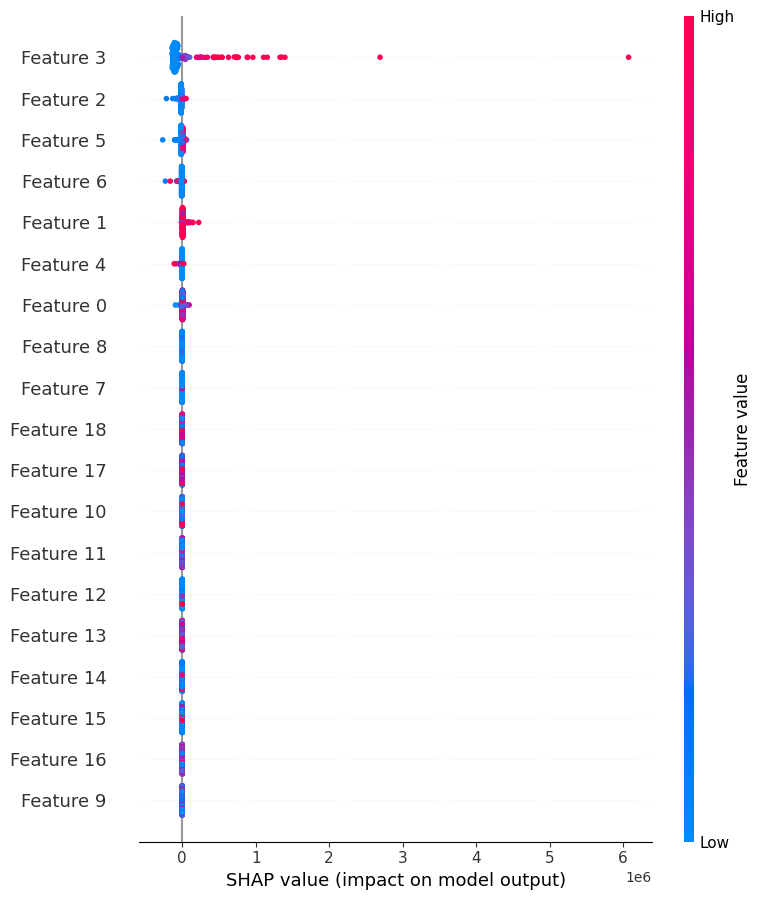

In [21]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

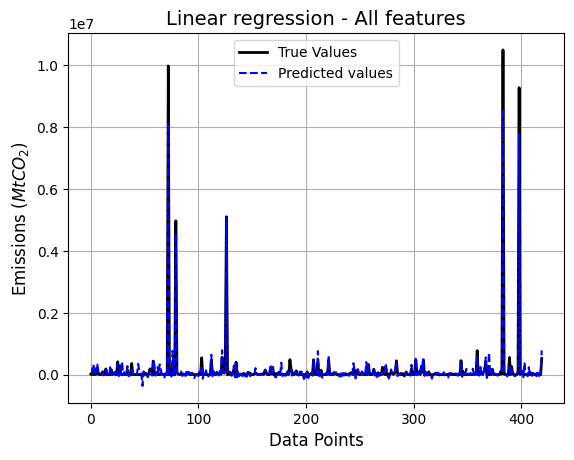

In [ ]:
plt.plot(y_test, label="True Values", color='black', linewidth=2)
plt.plot(y_pred_linear, label="Predicted values", color='blue', linestyle='--')
plt.title("Linear regression - All features", fontsize=14)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel(r"Emissions $(MtCO_{2})$", fontsize=12)
#plt.ylim(0,0.15*10**7)
plt.legend(fontsize=10)
plt.grid(True)

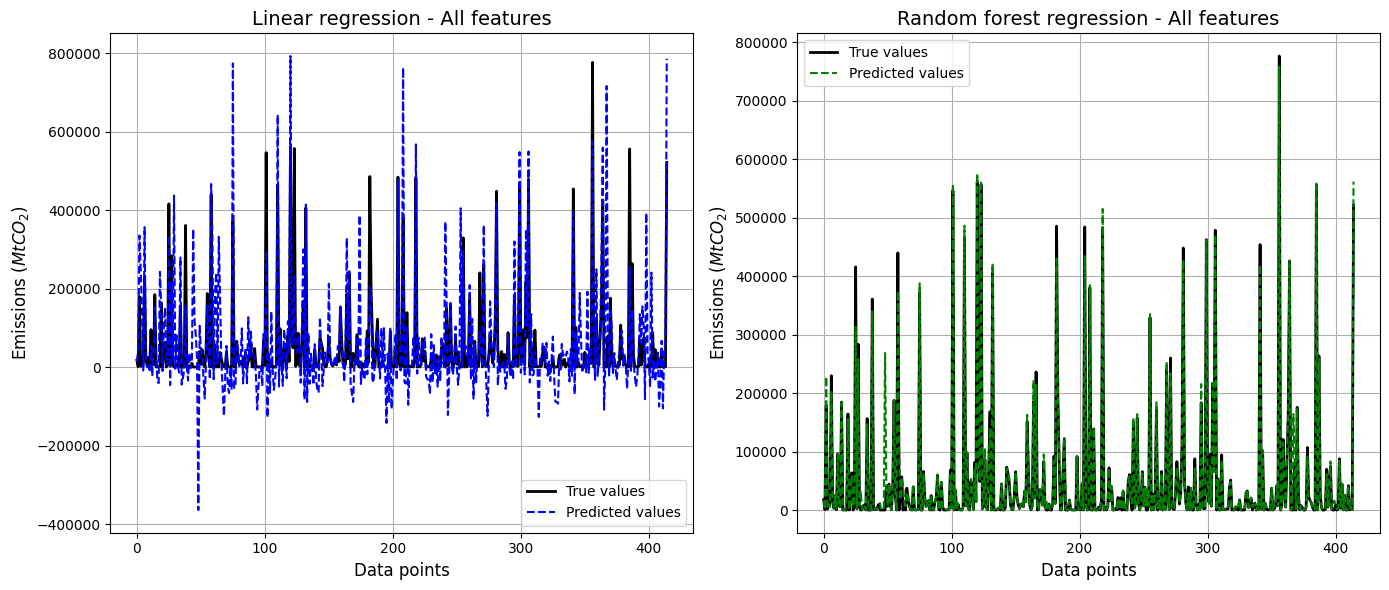

In [ ]:
# Plotting side-by-side line charts using plt
plt.figure(figsize=(14, 6))

y_true = y_test
y_pred1 = y_pred_rfr
y_pred2 = y_pred_rfr_imp

# First subplot for Model 1
plt.subplot(1, 2, 1)
plt.plot(y_test[y_test <0.15*10**7], label="True values", color='black', linewidth=2)
plt.plot(y_pred_linear[y_pred_linear<0.15*10**7], label="Predicted values", color='blue', linestyle='--')
plt.title("Linear regression - All features", fontsize=14)
plt.xlabel("Data points", fontsize=12)
plt.ylabel(r"Emissions $(MtCO_{2})$", fontsize=12)
#plt.ylim(0,0.15*10**7)
plt.legend(fontsize=10)
plt.grid(True)

# Second subplot for Model 2
plt.subplot(1, 2, 2)
plt.plot(y_test[y_test <0.15*10**7], label="True values", color='black', linewidth=2)
plt.plot(y_pred_rfr[y_pred_rfr<0.15*10**7], label="Predicted values", color='green', linestyle='--')
plt.title("Random forest regression - All features", fontsize=14)
plt.xlabel("Data points", fontsize=12)
plt.ylabel(r"Emissions $(MtCO_{2})$", fontsize=12)
#plt.ylim(0,0.15*10**7)
plt.legend(fontsize=10)
plt.grid(True)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
# Plotting side-by-side line charts using plt
plt.figure(figsize=(14, 6))

# First subplot for Model 1
plt.subplot(1, 2, 1)
plt.plot(y_test[y_test <0.15*10**7], label="True values", color='black', linewidth=2)
plt.plot(y_pred_lasso[y_pred_lasso<0.15*10**7], label="Predicted values", color='blue', linestyle='--')
plt.title("Lasso Regression - All features", fontsize=14)
plt.xlabel("Data points", fontsize=12)
plt.ylabel(r"Emissions $(MtCO_{2})$", fontsize=12)
#plt.ylim(0,0.15*10**7)
plt.legend(fontsize=10)
plt.grid(True)

# Second subplot for Model 2
plt.subplot(1, 2, 2)
plt.plot(y_test[y_test <0.15*10**7], label="True values", color='black', linewidth=2)
plt.plot(y_pred_lasso_cv[y_pred_lasso_cv<0.15*10**7], label="Predicted values", color='green', linestyle='--')
plt.title("Lasso Regression - All features with alpha cross validation", fontsize=14)
plt.xlabel("Data points", fontsize=12)
plt.ylabel(r"Emissions $(MtCO_{2})$", fontsize=12)
#plt.ylim(0,0.15*10**7)
plt.legend(fontsize=10)
plt.grid(True)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


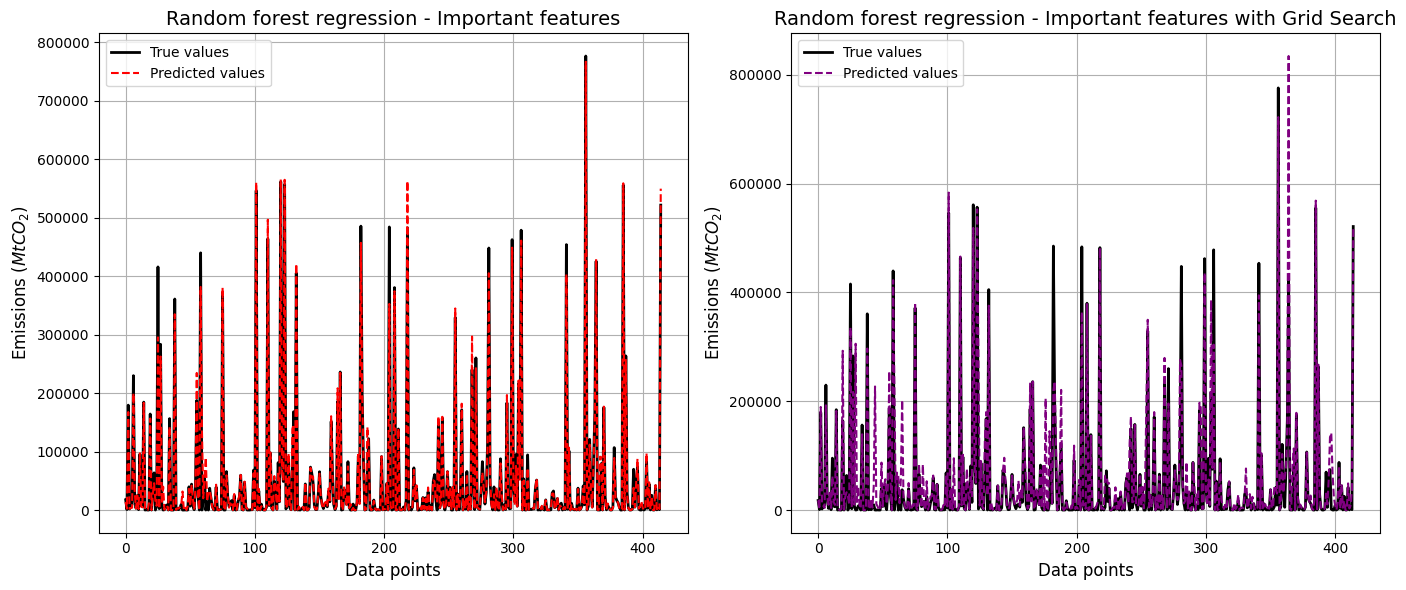

In [ ]:
# Plotting side-by-side line charts using plt
plt.figure(figsize=(14, 6))

# First subplot for Model 1
plt.subplot(1, 2, 1)
plt.plot(y_test[y_test <0.15*10**7], label="True values", color='black', linewidth=2)
plt.plot(y_pred_rfr_imp[y_pred_rfr_imp<0.15*10**7], label="Predicted values", color='red', linestyle='--')
plt.title("Random forest regression - Important features", fontsize=14)
plt.xlabel("Data points", fontsize=12)
plt.ylabel(r"Emissions $(MtCO_{2})$", fontsize=12)
#plt.ylim(0,0.15*10**7)
plt.legend(fontsize=10)
plt.grid(True)

# Second subplot for Model 2
plt.subplot(1, 2, 2)
plt.plot(y_test[y_test <0.15*10**7], label="True values", color='black', linewidth=2)
plt.plot(y_pred_rfr_imp_opt[y_pred_rfr_imp_opt<0.15*10**7], label="Predicted values", color='purple', linestyle='--')
plt.title("Random forest regression - Important features with Grid Search", fontsize=14)
plt.xlabel("Data points", fontsize=12)
plt.ylabel(r"Emissions $(MtCO_{2})$", fontsize=12)
#plt.ylim(0,0.15*10**7)
plt.legend(fontsize=10)
plt.grid(True)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


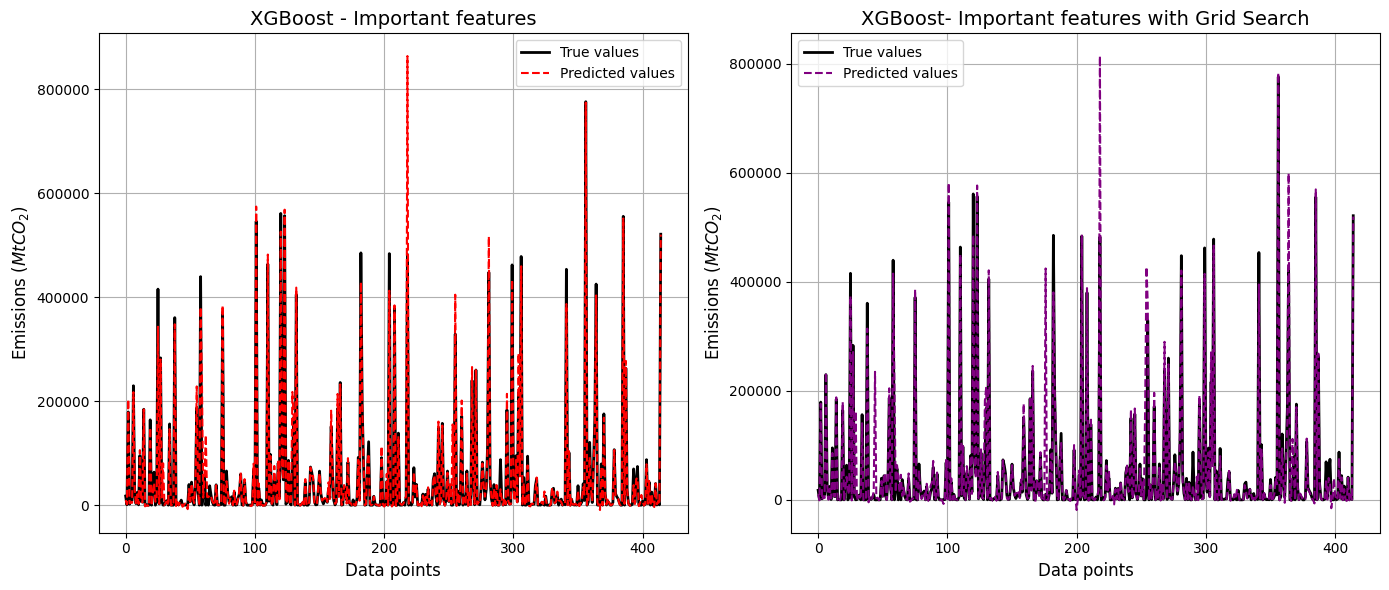

In [ ]:
# Plotting side-by-side line charts using plt
plt.figure(figsize=(14, 6))

# First subplot for Model 1
plt.subplot(1, 2, 1)
plt.plot(y_test[y_test <0.15*10**7], label="True values", color='black', linewidth=2)
plt.plot(y_pred_xgb[y_pred_xgb<0.15*10**7], label="Predicted values", color='red', linestyle='--')
plt.title("XGBoost - Important features", fontsize=14)
plt.xlabel("Data points", fontsize=12)
plt.ylabel(r"Emissions $(MtCO_{2})$", fontsize=12)
#plt.ylim(0,0.15*10**7)
plt.legend(fontsize=10)
plt.grid(True)

# Second subplot for Model 2
plt.subplot(1, 2, 2)
plt.plot(y_test[y_test <0.15*10**7], label="True values", color='black', linewidth=2)
plt.plot(y_pred_xgb_opt[y_pred_xgb_opt<0.15*10**7], label="Predicted values", color='purple', linestyle='--')
plt.title("XGBoost- Important features with Grid Search", fontsize=14)
plt.xlabel("Data points", fontsize=12)
plt.ylabel(r"Emissions $(MtCO_{2})$", fontsize=12)
#plt.ylim(0,0.15*10**7)
plt.legend(fontsize=10)
plt.grid(True)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


Advanced Approaches: 1. Forward Neural Networks

In [23]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import time

# Assuming X_train, X_test, y_train, y_test are defined earlier
X_train_tensor = torch.tensor(X_train_filtered, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_filtered, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

class FeedforwardNN(nn.Module):
    def __init__(self, input_dim):
        super(FeedforwardNN, self).__init__()
        self.first_hidden_layer = nn.Linear(input_dim, 256)
        self.new_layer = nn.Linear(256, 128)
        self.second_layer = nn.Linear(128, 64)
        self.third_layer = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.first_hidden_layer(x))
        out = self.relu(self.new_layer(out))
        out = self.relu(self.second_layer(out))
        out = self.relu(self.third_layer(out))
        return self.output_layer(out)

input_dim = X_train_tensor.shape[1]
model = FeedforwardNN(input_dim)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    y_pred_fnn_model = model(X_test_tensor)
    y_pred_fnn_model = y_pred_fnn_model.numpy()

# Compute RMSE and R²
fnn_model_mse = mean_squared_error(y_test, y_pred_fnn_model)
fnn_model_rmse = np.sqrt(fnn_model_mse)
fnn_model_r2 = r2_score(y_test, y_pred_fnn_model)
print("fnn_model MSE: ", fnn_model_mse)
print("fnn_model RMSE: ", fnn_model_rmse)
print("fnn_model R²: ", fnn_model_r2)
print('Model time in seconds: ', time.perf_counter() - start_time)

Epoch [10/1000], Loss: 572604743680.0000
Epoch [20/1000], Loss: 572604481536.0000
Epoch [30/1000], Loss: 572603891712.0000
Epoch [40/1000], Loss: 572601925632.0000
Epoch [50/1000], Loss: 572596355072.0000
Epoch [60/1000], Loss: 572583116800.0000
Epoch [70/1000], Loss: 572553560064.0000
Epoch [80/1000], Loss: 572492873728.0000
Epoch [90/1000], Loss: 572376809472.0000
Epoch [100/1000], Loss: 572167749632.0000
Epoch [110/1000], Loss: 571810447360.0000
Epoch [120/1000], Loss: 571228815360.0000
Epoch [130/1000], Loss: 570329661440.0000
Epoch [140/1000], Loss: 569004130304.0000
Epoch [150/1000], Loss: 567140679680.0000
Epoch [160/1000], Loss: 564650115072.0000
Epoch [170/1000], Loss: 561509629952.0000
Epoch [180/1000], Loss: 557821919232.0000
Epoch [190/1000], Loss: 553872326656.0000
Epoch [200/1000], Loss: 550107676672.0000
Epoch [210/1000], Loss: 546971222016.0000
Epoch [220/1000], Loss: 544709836800.0000
Epoch [230/1000], Loss: 543131795456.0000
Epoch [240/1000], Loss: 541760258048.0000
E

Epoch [10/1000], Loss: 572588163072.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [20/1000], Loss: 572092710912.0000, Train R²: -0.0314, Val R²: -0.0246
Epoch [30/1000], Loss: 567399219200.0000, Train R²: -0.0230, Val R²: -0.0168
Epoch [40/1000], Loss: 549250334720.0000, Train R²: 0.0097, Val R²: 0.0112
Epoch [50/1000], Loss: 541794107392.0000, Train R²: 0.0232, Val R²: 0.0247
Epoch [60/1000], Loss: 532152254464.0000, Train R²: 0.0406, Val R²: 0.0383
Epoch [70/1000], Loss: 509558161408.0000, Train R²: 0.0813, Val R²: 0.0798
Epoch [80/1000], Loss: 448350093312.0000, Train R²: 0.1917, Val R²: 0.1899
Epoch [90/1000], Loss: 321670610944.0000, Train R²: 0.4201, Val R²: 0.4371
Epoch [100/1000], Loss: 181150613504.0000, Train R²: 0.6734, Val R²: 0.7619
Epoch [110/1000], Loss: 121603014656.0000, Train R²: 0.7808, Val R²: 0.9161
Epoch [120/1000], Loss: 103593607168.0000, Train R²: 0.8132, Val R²: 0.9501
Epoch [130/1000], Loss: 96341180416.0000, Train R²: 0.8263, Val R²: 0.9532
Epoch [140/1000]

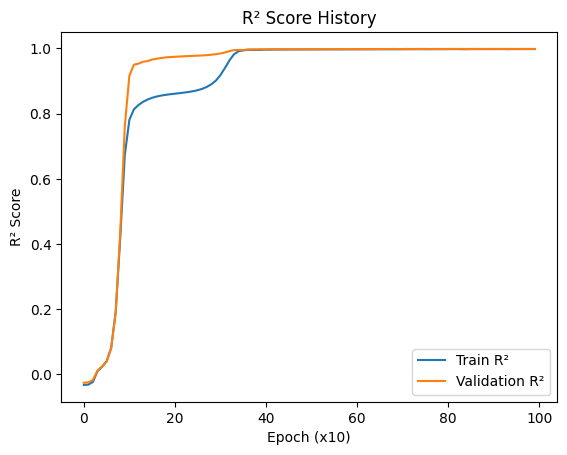

In [41]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import time

# Assuming X_train, X_test, y_train, y_test are defined earlier
X_train_tensor = torch.tensor(X_train_filtered, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_filtered, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

class FeedforwardNN(nn.Module):
    def __init__(self, input_dim):
        super(FeedforwardNN, self).__init__()
        self.first_hidden_layer = nn.Linear(input_dim, 256)
        self.new_layer = nn.Linear(256, 128)
        self.second_layer = nn.Linear(128, 64)
        self.third_layer = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.first_hidden_layer(x))
        out = self.relu(self.new_layer(out))
        out = self.relu(self.second_layer(out))
        out = self.relu(self.third_layer(out))
        return self.output_layer(out)

input_dim = X_train_tensor.shape[1]
model = FeedforwardNN(input_dim)

optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Training loop
epochs = 1000
start_time = time.perf_counter()

train_r2_history = []
val_r2_history = []

for epoch in range(epochs):
    model.train()
    # Forward pass
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate R² for training and validation sets every 10 epochs
    if (epoch + 1) % 10 == 0:
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            # Training R²
            train_r2 = r2_score(y_train_tensor.numpy(), y_pred.numpy())
            train_r2_history.append(train_r2)

            # Validation predictions
            y_val_pred = model(X_test_tensor)
            val_r2 = r2_score(y_test_tensor.numpy(), y_val_pred.numpy())
            val_r2_history.append(val_r2)

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}")

model.eval()  # Final evaluation after training
with torch.no_grad():
    y_pred_fnn_model = model(X_test_tensor).numpy()

# Compute RMSE and R²
fnn_model_mse = mean_squared_error(y_test, y_pred_fnn_model)
fnn_model_rmse = np.sqrt(fnn_model_mse)
fnn_model_r2 = r2_score(y_test, y_pred_fnn_model)
print("\nFinal Model Metrics:")
print("fnn_model MSE: ", fnn_model_mse)
print("fnn_model RMSE: ", fnn_model_rmse)
print("fnn_model R²: ", fnn_model_r2)
print('Model time in seconds: ', time.perf_counter() - start_time)

# Optional: Plot training and validation R² history
import matplotlib.pyplot as plt
plt.plot(train_r2_history, label="Train R²")
plt.plot(val_r2_history, label="Validation R²")
plt.xlabel("Epoch (x10)")
plt.ylabel("R² Score")
plt.legend()
plt.title("R² Score History")
plt.show()


Epoch [10/1000], Loss: 572604743680.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [20/1000], Loss: 572604612608.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [30/1000], Loss: 572604350464.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [40/1000], Loss: 572603760640.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [50/1000], Loss: 572602449920.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [60/1000], Loss: 572600090624.0000, Train R²: -0.0324, Val R²: -0.0255
Epoch [70/1000], Loss: 572595961856.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [80/1000], Loss: 572589408256.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [90/1000], Loss: 572576169984.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [100/1000], Loss: 572558606336.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [110/1000], Loss: 572531408896.0000, Train R²: -0.0322, Val R²: -0.0254
Epoch [120/1000], Loss: 572492742656.0000, Train R²: -0.0322, Val R²: -0.0254
Epoch [130/1000], Loss: 572436840448.0000, Train R²: -0.0321, Val R²: -0.

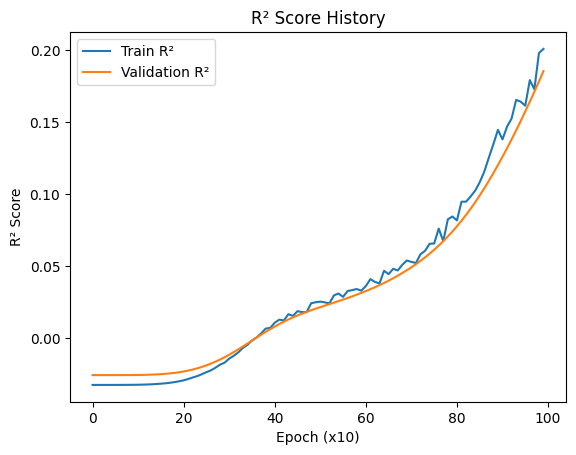

In [42]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import time

# Assuming X_train, X_test, y_train, y_test are defined earlier
X_train_tensor = torch.tensor(X_train_filtered, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_filtered, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)  # Reshape to match output

class FeedforwardNN(nn.Module):
    def __init__(self, input_dim):
        super(FeedforwardNN, self).__init__()
        self.first_hidden_layer = nn.Linear(input_dim, 128)
        self.dropout = nn.Dropout(0.1)
        self.second_layer = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.2)
        self.third_layer = nn.Linear(64, 32)
        self.dropout = nn.Dropout(0.3)
        self.output_layer = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self,x):
        out = self.relu(self.first_hidden_layer(x))
        out = self.dropout(out)
        out = self.relu(self.second_layer(out))
        out = self.dropout(out)
        out = self.relu(self.third_layer(out))
        return self.output_layer(out)

input_dim = X_train_tensor.shape[1]
model = FeedforwardNN(input_dim)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Training loop
epochs = 1000
start_time = time.perf_counter()

train_r2_history = []
val_r2_history = []

for epoch in range(epochs):
    model.train()
    # Forward pass
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate R² for training and validation sets every 10 epochs
    if (epoch + 1) % 10 == 0:
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            # Training R²
            train_r2 = r2_score(y_train_tensor.numpy(), y_pred.numpy())
            train_r2_history.append(train_r2)

            # Validation predictions
            y_val_pred = model(X_test_tensor)
            val_r2 = r2_score(y_test_tensor.numpy(), y_val_pred.numpy())
            val_r2_history.append(val_r2)

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}")

model.eval()  # Final evaluation after training
with torch.no_grad():
    y_pred_fnn_model = model(X_test_tensor).numpy()

# Compute RMSE and R²
fnn_model_mse = mean_squared_error(y_test, y_pred_fnn_model)
fnn_model_rmse = np.sqrt(fnn_model_mse)
fnn_model_r2 = r2_score(y_test, y_pred_fnn_model)
print("\nFinal Model Metrics:")
print("fnn_model MSE: ", fnn_model_mse)
print("fnn_model RMSE: ", fnn_model_rmse)
print("fnn_model R²: ", fnn_model_r2)
print('Model time in seconds: ', time.perf_counter() - start_time)

# Optional: Plot training and validation R² history
import matplotlib.pyplot as plt
plt.plot(train_r2_history, label="Train R²")
plt.plot(val_r2_history, label="Validation R²")
plt.xlabel("Epoch (x10)")
plt.ylabel("R² Score")
plt.legend()
plt.title("R² Score History")
plt.show()

Epoch [10/1000], Loss: 572600418304.0000, Train R²: -0.0324, Val R²: -0.0255
Epoch [20/1000], Loss: 572541894656.0000, Train R²: -0.0322, Val R²: -0.0255
Epoch [30/1000], Loss: 572215918592.0000, Train R²: -0.0317, Val R²: -0.0249
Epoch [40/1000], Loss: 570936393728.0000, Train R²: -0.0294, Val R²: -0.0230
Epoch [50/1000], Loss: 567365992448.0000, Train R²: -0.0229, Val R²: -0.0179
Epoch [60/1000], Loss: 560323035136.0000, Train R²: -0.0102, Val R²: -0.0074
Epoch [70/1000], Loss: 550122815488.0000, Train R²: 0.0082, Val R²: 0.0073
Epoch [80/1000], Loss: 542869422080.0000, Train R²: 0.0212, Val R²: 0.0176
Epoch [90/1000], Loss: 542759124992.0000, Train R²: 0.0214, Val R²: 0.0239
Epoch [100/1000], Loss: 534330212352.0000, Train R²: 0.0366, Val R²: 0.0306
Epoch [110/1000], Loss: 527861481472.0000, Train R²: 0.0483, Val R²: 0.0409
Epoch [120/1000], Loss: 524772638720.0000, Train R²: 0.0539, Val R²: 0.0574
Epoch [130/1000], Loss: 506513588224.0000, Train R²: 0.0868, Val R²: 0.0831
Epoch [14

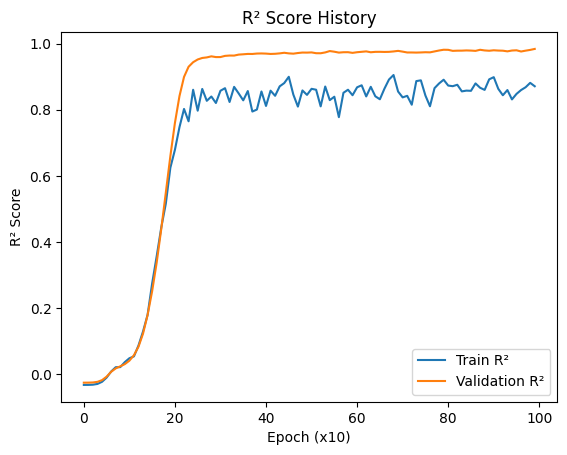

In [43]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import time

# Assuming X_train, X_test, y_train, y_test are defined earlier
X_train_tensor = torch.tensor(X_train_filtered, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_filtered, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)   # Reshape to match output

class FeedforwardNN(nn.Module):
    def __init__(self, input_dim):
        super(FeedforwardNN, self).__init__()
        self.first_hidden_layer = nn.Linear(input_dim, 128)
        self.dropout = nn.Dropout(0.1)
        self.second_layer = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.2)
        self.third_layer = nn.Linear(64, 32)
        self.dropout = nn.Dropout(0.3)
        self.output_layer = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self,x):
        out = self.relu(self.first_hidden_layer(x))
        out = self.dropout(out)
        out = self.relu(self.second_layer(out))
        out = self.dropout(out)
        out = self.relu(self.third_layer(out))
        return self.output_layer(out)

input_dim = X_train_tensor.shape[1]
model = FeedforwardNN(input_dim)

optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Training loop
epochs = 1000
start_time = time.perf_counter()

train_r2_history = []
val_r2_history = []

for epoch in range(epochs):
    model.train()
    # Forward pass
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate R² for training and validation sets every 10 epochs
    if (epoch + 1) % 10 == 0:
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            # Training R²
            train_r2 = r2_score(y_train_tensor.numpy(), y_pred.numpy())
            train_r2_history.append(train_r2)

            # Validation predictions
            y_val_pred = model(X_test_tensor)
            val_r2 = r2_score(y_test_tensor.numpy(), y_val_pred.numpy())
            val_r2_history.append(val_r2)

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}")

model.eval()  # Final evaluation after training
with torch.no_grad():
    y_pred_fnn_model = model(X_test_tensor).numpy()

# Compute RMSE and R²
fnn_model_mse = mean_squared_error(y_test, y_pred_fnn_model)
fnn_model_rmse = np.sqrt(fnn_model_mse)
fnn_model_r2 = r2_score(y_test, y_pred_fnn_model)
print("\nFinal Model Metrics:")
print("fnn_model MSE: ", fnn_model_mse)
print("fnn_model RMSE: ", fnn_model_rmse)
print("fnn_model R²: ", fnn_model_r2)
print('Model time in seconds: ', time.perf_counter() - start_time)

# Optional: Plot training and validation R² history
import matplotlib.pyplot as plt
plt.plot(train_r2_history, label="Train R²")
plt.plot(val_r2_history, label="Validation R²")
plt.xlabel("Epoch (x10)")
plt.ylabel("R² Score")
plt.legend()
plt.title("R² Score History")
plt.show()